## Importing libraries

In [1]:
# Importing preprocessing tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Importing KMeans Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering


# Setting options to print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Importing required metrics
from sklearn.metrics import silhouette_score

# Importing imputation tools
from sklearn.impute import SimpleImputer

# Importing datasets for PCA
from sklearn.decomposition import PCA

# To Build a dendodram to figure out the number of clusters to divide the data into.
import scipy.cluster.hierarchy as sch

# Setting option to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing data analysis libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Setting options for displaying all the columns in a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 12)

## Importing data

In [2]:
df = pd.read_csv('../../Datasets/credit-card-data.csv')

## Basic Checks
<!-- list.files(path = "../input") -->

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Observations:
- CustID can be dropped
- Missing values are there for CREDIT_LIMIT and MINIMUM_PAYMENTS, need to impute
- Datatypes look fine

In [5]:
df.drop('CUST_ID', axis=1, inplace=True)

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observations
- the data needs to be scaled

## Missing Values Imputation

In [7]:
# Creating a definition for checking the percentages of 
# missing values in the data and sorting the dataframe to be returned
# to view the largest missing data first
def view_missing(df):
    missing_df = pd.DataFrame()
    missing_df['Columns'] = df.columns
    missing_df['Percentage'] = [(i / len(df)) * 100 for i in df.isnull().sum()]
    return missing_df.sort_values('Percentage', ascending=False)

In [8]:
view_missing(df)

,Columns,Percentage
14,MINIMUM_PAYMENTS,3.497207
12,CREDIT_LIMIT,0.011173
0,BALANCE,0.000000
9,CASH_ADVANCE_FREQUENCY,0.000000
15,PRC_FULL_PAYMENT,0.000000
...,...,...
5,CASH_ADVANCE,0.000000
4,INSTALLMENTS_PURCHASES,0.000000
3,ONEOFF_PURCHASES,0.000000
2,PURCHASES,0.000000


In [9]:
# Using SimpleImputer for imputing missing values
imputer = SimpleImputer()
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']] = imputer.fit_transform(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']])

In [10]:
view_missing(df)

,Columns,Percentage
0,BALANCE,0.0
9,CASH_ADVANCE_FREQUENCY,0.0
15,PRC_FULL_PAYMENT,0.0
14,MINIMUM_PAYMENTS,0.0
13,PAYMENTS,0.0
...,...,...
5,CASH_ADVANCE,0.0
4,INSTALLMENTS_PURCHASES,0.0
3,ONEOFF_PURCHASES,0.0
2,PURCHASES,0.0


## Data Preparation, Exploratory Data Analysis

### Outlier Treatment

In [11]:
cols = df.select_dtypes([float, int]).columns

In [12]:
# Clipping the data to the upper quantile of 90% and lower quantile at 10%, chose these values after experimentation
df[cols] = df[cols].apply(lambda x: x.clip(lower = x.quantile(0.1), upper=x.quantile(0.9)))

In [13]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1200.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,3065.534560,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,3923.906642,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,179.617069,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


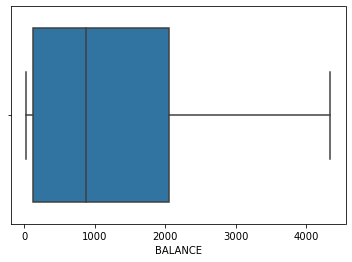

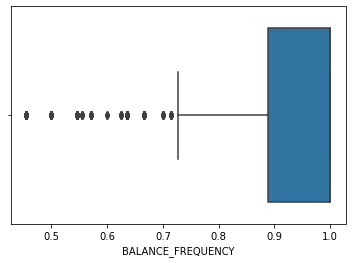

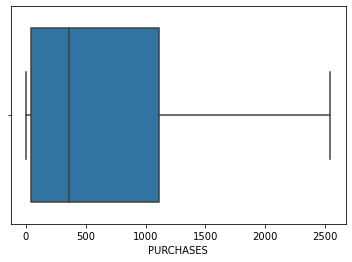

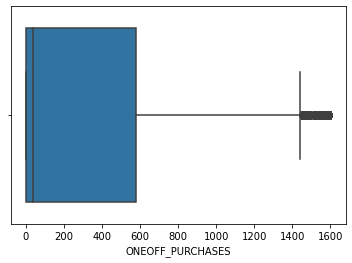

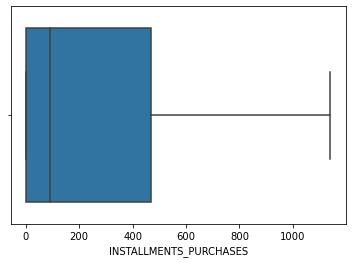

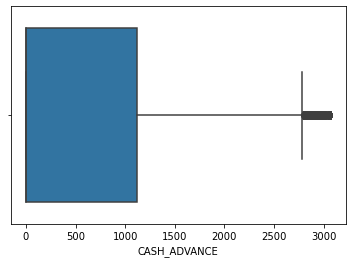

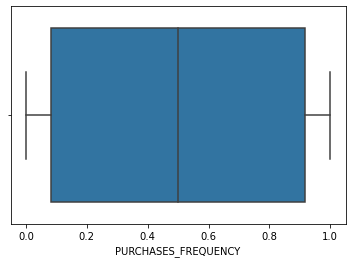

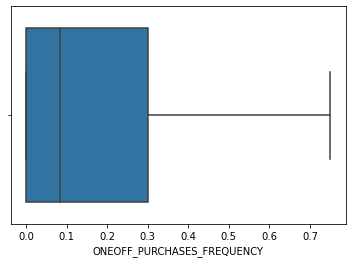

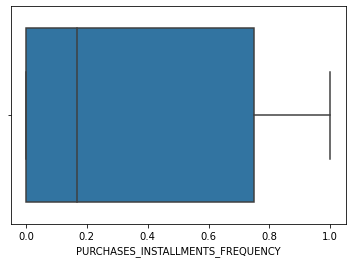

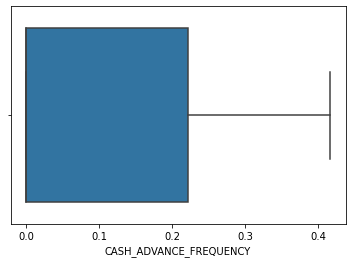

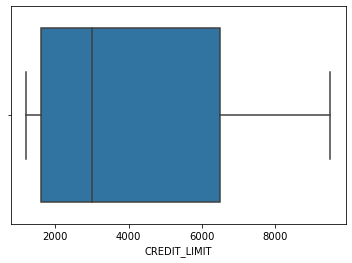

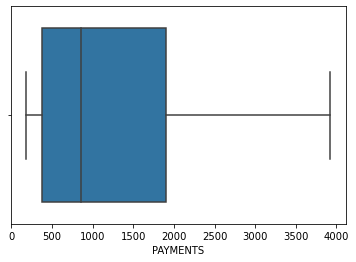

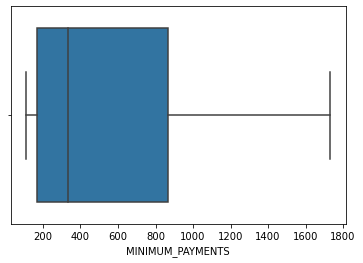

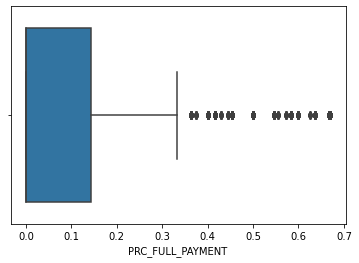

In [14]:
# Viewing the boxplots for further check
for i in cols:
    sns.boxplot(df[i])
    plt.show()

Observations 
- There are still some outliers, but after clipping too, if we have outliers, 
    they might be significant. 
- Without more info on the variables, continuing with the analysis

### Deriving new KPI

In [15]:
# 1. Monthly Average Purchases
df['MONTHLY_AVERAGE_PURCHASES'] = df['PURCHASES'] / df['TENURE']
df[['PURCHASES', 'TENURE', 'MONTHLY_AVERAGE_PURCHASES']].corr()
print('Dropping PURCHASES because of it\'s correlation with MONTHLY_AVERAGE_PURCHASES')
df.drop('PURCHASES', axis=1, inplace=True)

,PURCHASES,TENURE,MONTHLY_AVERAGE_PURCHASES
PURCHASES,1.000000,0.120668,0.986164
TENURE,0.120668,1.000000,0.024849
MONTHLY_AVERAGE_PURCHASES,0.986164,0.024849,1.000000


Dropping PURCHASES because of it's correlation with MONTHLY_AVERAGE_PURCHASES


In [16]:
# 2. Monthly Cash Advance Amount
df['MONTHLY_CASH_ADVANCE'] = df['CASH_ADVANCE'] / df['TENURE']
df[['CASH_ADVANCE', 'TENURE', 'MONTHLY_CASH_ADVANCE']].corr()
print('Dropping CASH_ADVANCE because of it\'s correlation with MONTHLY_CASH_ADVANCE')
df.drop('CASH_ADVANCE', axis=1, inplace=True)

,CASH_ADVANCE,TENURE,MONTHLY_CASH_ADVANCE
CASH_ADVANCE,1.000000,-0.097870,0.969371
TENURE,-0.097870,1.000000,-0.249088
MONTHLY_CASH_ADVANCE,0.969371,-0.249088,1.000000


Dropping CASH_ADVANCE because of it's correlation with MONTHLY_CASH_ADVANCE


In [17]:
def type_of_purchase(df):
    if (df['ONEOFF_PURCHASES'] == 0) and (df['INSTALLMENTS_PURCHASES'] == 0) :
        return 'NONE'
    elif (df['ONEOFF_PURCHASES'] > 0) and (df['INSTALLMENTS_PURCHASES']) > 0 :
        return 'BOTH'
    elif (df['ONEOFF_PURCHASES'] > 0) and (df['INSTALLMENTS_PURCHASES'] == 0) :
        return 'ONE_OFF'
    elif (df['ONEOFF_PURCHASES'] == 0) and (df['INSTALLMENTS_PURCHASES'] > 0) :
        return 'INSTALLMENTS'

In [18]:
df['TYPE_OF_PURCHASE'] = df.apply(type_of_purchase, axis=1)

In [19]:
# 4. Limit Usage
df['LIMIT_USAGE'] = df.apply(lambda x: round(x['BALANCE']/x['CREDIT_LIMIT'], 2), axis=1)
df.drop(['BALANCE', 'CREDIT_LIMIT'], axis=1, inplace=True)

In [20]:
# 5. Payment to Minimum Payments Ratio
df['PAYTOMINPAY'] = df.apply(lambda x: round(x['PAYMENTS'] / x['MINIMUM_PAYMENTS'],2), axis=1)
df.drop(['PAYMENTS', 'MINIMUM_PAYMENTS'], axis=1, inplace=True)

### Encoding the data

In [21]:
# using dummiies method in pandas for encoding categorical data

# converting the type of variable to category
df['TYPE_OF_PURCHASE'] = df['TYPE_OF_PURCHASE'].astype('category')

# getting dummy variables
df = pd.concat([df,pd.get_dummies(df['TYPE_OF_PURCHASE'], drop_first=True)], axis=1)

# dropping the original variable
df.drop('TYPE_OF_PURCHASE', axis=1, inplace=True)

### EDA Visualization

In [22]:
cont_vars = df.select_dtypes([int, float])

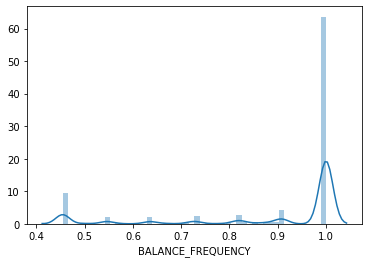

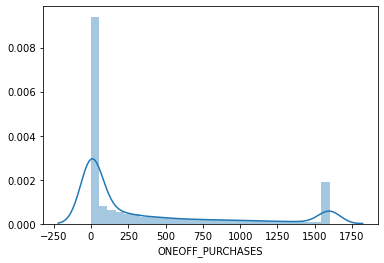

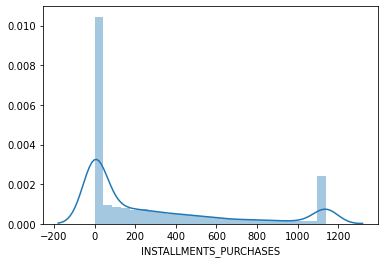

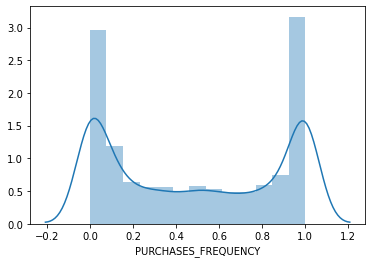

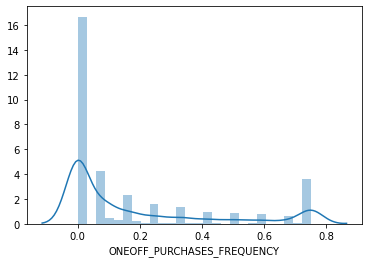

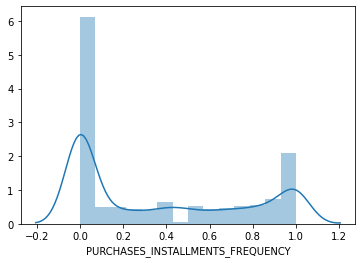

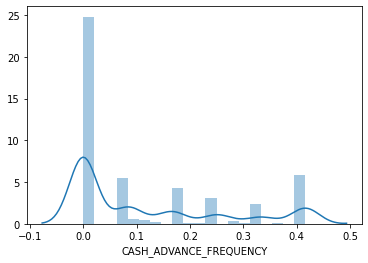

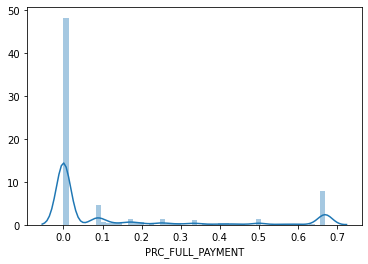

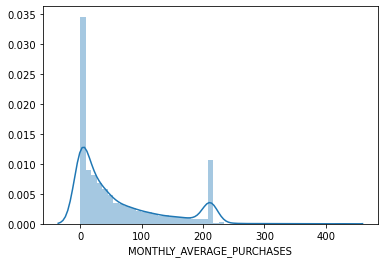

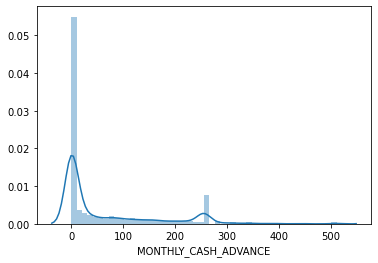

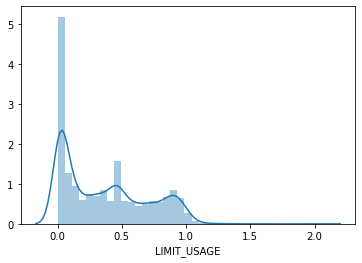

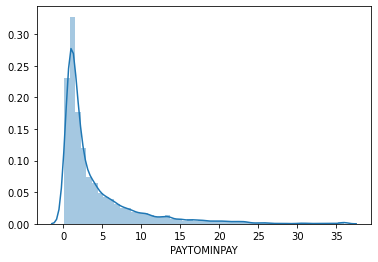

In [23]:
for i in cont_vars:
    sns.distplot(df[i])
    plt.show()

### Correlation Check

<Figure size 1440x1440 with 0 Axes>

[Text(0.5, 0, 'BALANCE_FREQUENCY'),
 Text(1.5, 0, 'ONEOFF_PURCHASES'),
 Text(2.5, 0, 'INSTALLMENTS_PURCHASES'),
 Text(3.5, 0, 'PURCHASES_FREQUENCY'),
 Text(4.5, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(5.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(6.5, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(7.5, 0, 'CASH_ADVANCE_TRX'),
 Text(8.5, 0, 'PURCHASES_TRX'),
 Text(9.5, 0, 'PRC_FULL_PAYMENT'),
 Text(10.5, 0, 'TENURE'),
 Text(11.5, 0, 'MONTHLY_AVERAGE_PURCHASES'),
 Text(12.5, 0, 'MONTHLY_CASH_ADVANCE'),
 Text(13.5, 0, 'LIMIT_USAGE'),
 Text(14.5, 0, 'PAYTOMINPAY'),
 Text(15.5, 0, 'INSTALLMENTS'),
 Text(16.5, 0, 'NONE'),
 Text(17.5, 0, 'ONE_OFF')]

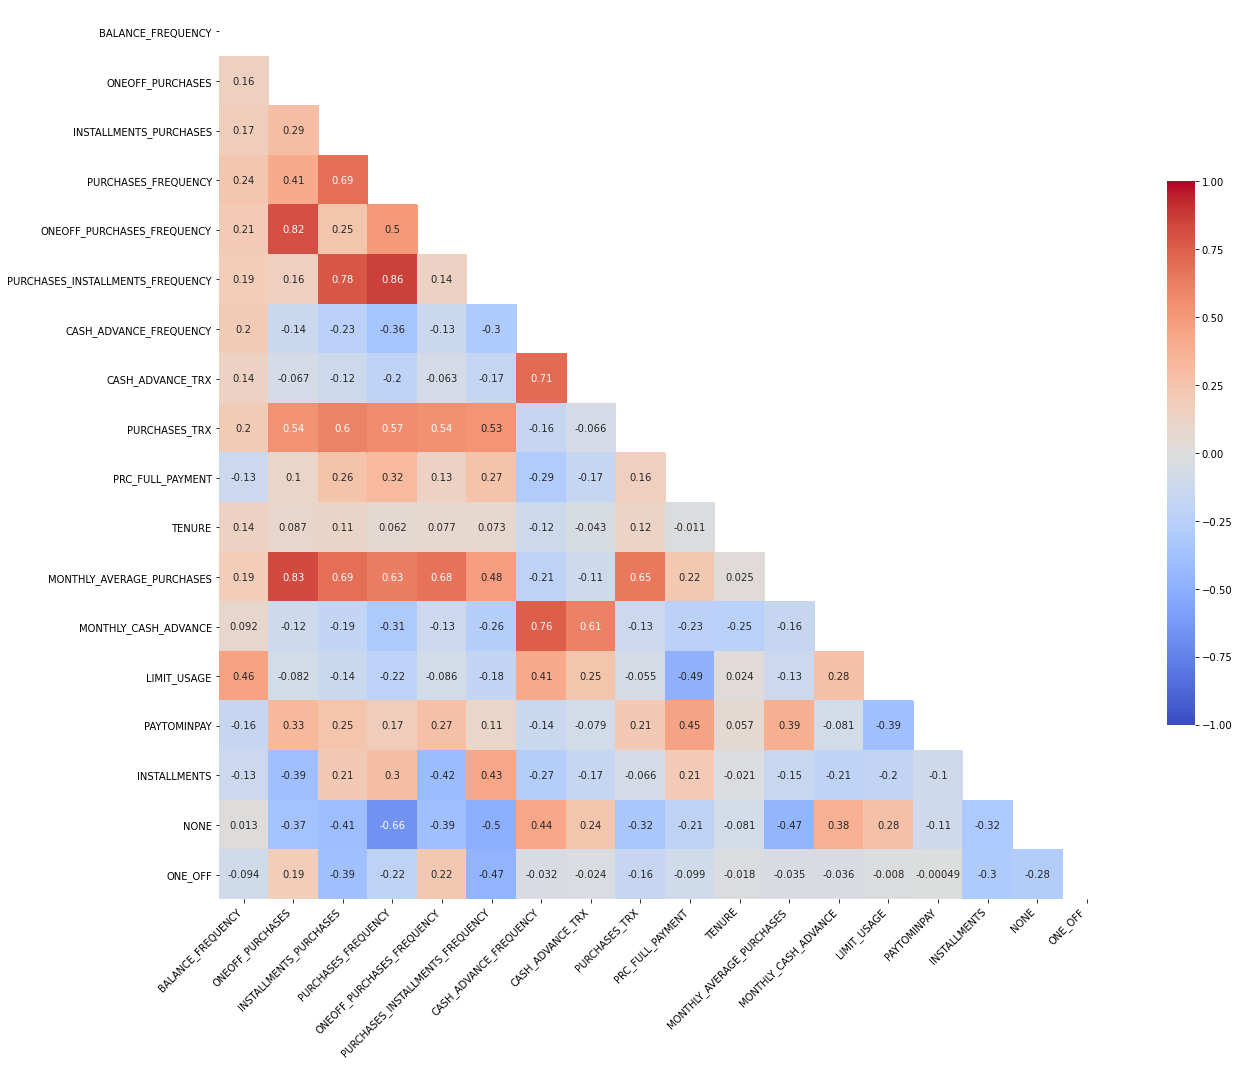

In [24]:
plt.figure(figsize=(20, 20))
mask = np.triu(df.corr())
chart = sns.heatmap(df.corr(), square=True, annot=True, 
            vmin=-1, vmax=1, cmap='coolwarm',
           cbar_kws={'shrink':0.5}, mask=mask)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Observations:
- Cash advance trx and cash advance frequency are highly correlated, so going to remove one of them
- Monthly Average Purchases and One-Off Purchases are highly correlated
- Monthly Average Purchases and Purchases TRX are highly correlated
- Purchases Transactions and Purchases frequency are highly correlated
- Purchases Installment Frequency and Purchases Freequency are highly correlated
- Oneoff purchases and one off purchases frequency are highly correlated

In [25]:
df = df.drop(['CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES', 'PURCHASES_TRX',\
         'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY'], axis=1)

<Figure size 1440x1440 with 0 Axes>

[Text(0.5, 0, 'BALANCE_FREQUENCY'),
 Text(1.5, 0, 'INSTALLMENTS_PURCHASES'),
 Text(2.5, 0, 'PURCHASES_FREQUENCY'),
 Text(3.5, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(4.5, 0, 'PRC_FULL_PAYMENT'),
 Text(5.5, 0, 'TENURE'),
 Text(6.5, 0, 'MONTHLY_AVERAGE_PURCHASES'),
 Text(7.5, 0, 'MONTHLY_CASH_ADVANCE'),
 Text(8.5, 0, 'LIMIT_USAGE'),
 Text(9.5, 0, 'PAYTOMINPAY'),
 Text(10.5, 0, 'INSTALLMENTS'),
 Text(11.5, 0, 'NONE'),
 Text(12.5, 0, 'ONE_OFF')]

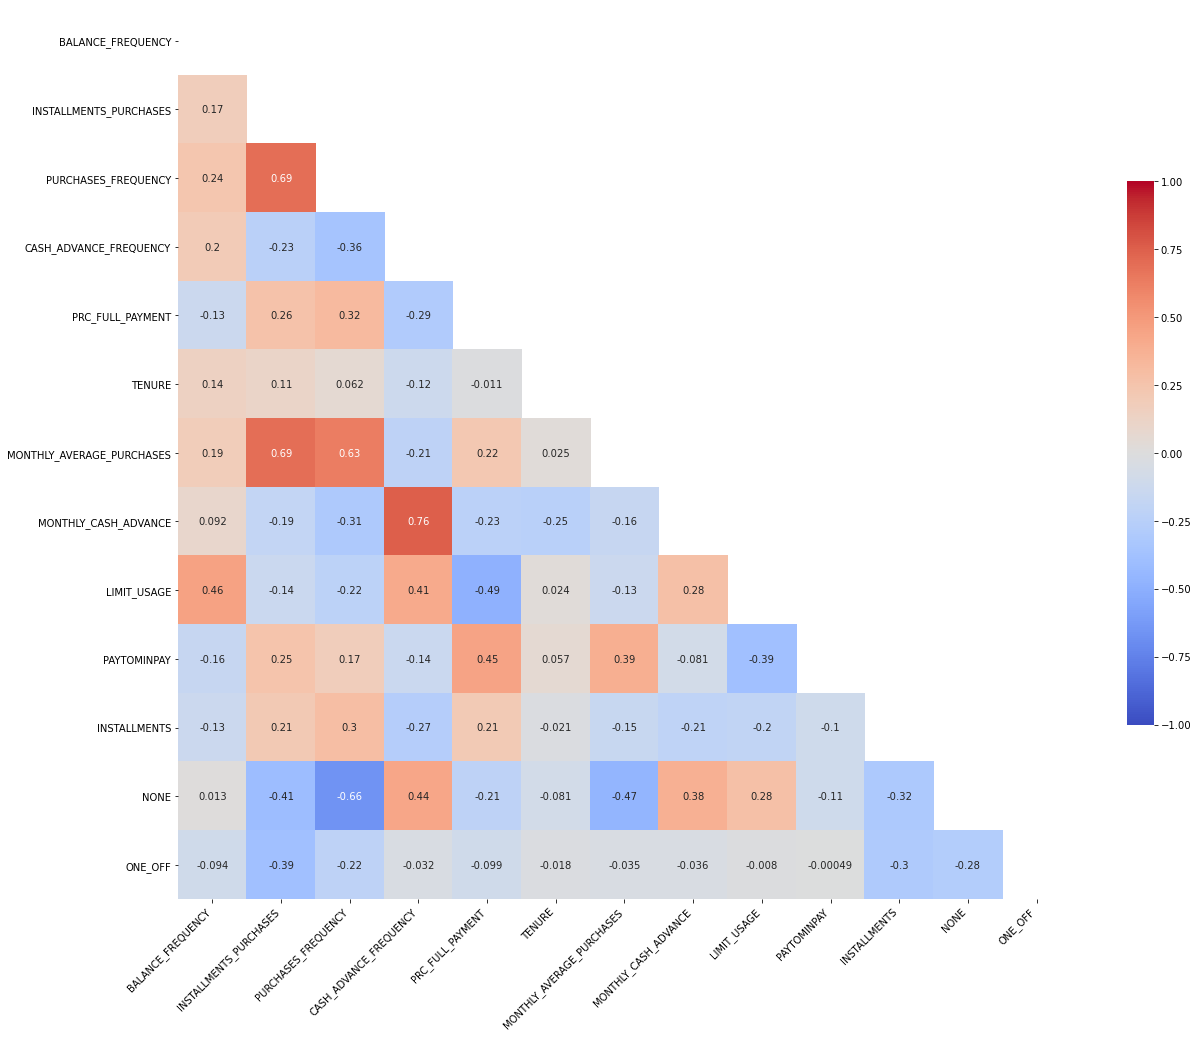

In [26]:
plt.figure(figsize=(20, 20))
mask = np.triu(df.corr())
chart = sns.heatmap(df.corr(), square=True, annot=True, 
            vmin=-1, vmax=1, cmap='coolwarm',
           cbar_kws={'shrink':0.5}, mask=mask)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Standardization

In [27]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [28]:
df.head()

,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVERAGE_PURCHASES,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYTOMINPAY,INSTALLMENTS,NONE,ONE_OFF
0,-0.418299,-0.506084,-0.806490,-0.773925,-0.565256,0.36068,-0.746478,-0.638722,-1.010074,-0.512871,1.720516,-0.543690,-0.514625
1,0.070718,-0.751122,-1.221758,0.899287,0.410741,0.36068,-0.855531,1.915262,0.300806,-0.092978,-0.581221,1.839282,-0.514625
2,0.559735,-0.751122,1.269843,-0.773925,-0.565256,0.36068,0.028289,-0.638722,-0.095507,-0.600270,-0.581221,-0.543690,1.943162
3,-1.396334,-0.751122,-1.014125,-0.216190,-0.565256,0.36068,0.857995,-0.467274,-0.430848,-0.748467,-0.581221,-0.543690,1.943162
4,0.559735,-0.751122,-1.014125,-0.773925,-0.565256,0.36068,-0.837241,-0.638722,0.971489,-0.262075,-0.581221,-0.543690,1.943162


## Dimensionality Reduction for Model Building

### PCA

In [29]:
pc = PCA(n_components=13)
pc.fit(df)

PCA(n_components=13)

In [30]:
pc.explained_variance_

array([3.8662055 , 2.00623524, 1.5224061 , 1.43566916, 1.10966564,
       0.75556979, 0.68556289, 0.4534011 , 0.37910635, 0.25252454,
       0.21896396, 0.17530848, 0.14083394])

In [31]:
pc.explained_variance_ratio_

array([0.29736719, 0.15430854, 0.11709508, 0.11042375, 0.08534936,
       0.05811426, 0.05272971, 0.03487311, 0.02915877, 0.01942279,
       0.0168415 , 0.01348376, 0.01083217])

In [32]:
pc_cumsum = np.cumsum(pc.explained_variance_ratio_) * 100
pc_cumsum

array([ 29.73671937,  45.16757381,  56.87708153,  67.91945652,
        76.45439231,  82.26581819,  87.53878966,  91.02610076,
        93.94197761,  95.88425699,  97.56840695,  98.91678305,
       100.        ])

In [33]:
# pd.DataFrame([pc_cumsum, pc.explained_variance_], index = df.columns, columns = ['cumsum', 'eigen'])
pd.set_option('display.max_rows' , None)
print(pd.DataFrame({'cumsum':pc_cumsum, 
                    'eigen':pc.explained_variance_},
                   index = df.columns))
pd.set_option('display.max_rows' , 12)


                               cumsum     eigen
BALANCE_FREQUENCY           29.736719  3.866205
INSTALLMENTS_PURCHASES      45.167574  2.006235
PURCHASES_FREQUENCY         56.877082  1.522406
CASH_ADVANCE_FREQUENCY      67.919457  1.435669
PRC_FULL_PAYMENT            76.454392  1.109666
TENURE                      82.265818  0.755570
MONTHLY_AVERAGE_PURCHASES   87.538790  0.685563
MONTHLY_CASH_ADVANCE        91.026101  0.453401
LIMIT_USAGE                 93.941978  0.379106
PAYTOMINPAY                 95.884257  0.252525
INSTALLMENTS                97.568407  0.218964
NONE                        98.916783  0.175308
ONE_OFF                    100.000000  0.140834


Observations:
- 82 percent of the variance in the data is explained by the first 6 variables, so will be taking them to build the final model

In [34]:
pc_final=PCA(n_components=5).fit(df)
reduced_cr=pc_final.fit_transform(df) 
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ['C' + str(i) for i in range(0,5)]

In [35]:
dimensions.head()

,C0,C1,C2,C3,C4
0,-0.287370,-1.532490,-1.548831,-1.085235,-0.020725
1,2.642109,0.029246,1.303495,-0.876428,-0.931605
2,-0.413936,-0.157589,-1.299175,2.110654,0.520113
3,0.371148,-1.499501,-0.419563,2.092893,0.567401
4,1.026682,-0.682770,-1.427534,2.107967,-0.045823


## Model Building

### Determining the best number of clusters using Silhouette Method

In [36]:
k_range = range(3,8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(silhouette_score(dimensions, km.labels_))

KMeans(n_clusters=3, random_state=123)

KMeans(n_clusters=4, random_state=123)

KMeans(n_clusters=5, random_state=123)

KMeans(n_clusters=6, random_state=123)

KMeans(n_clusters=7, random_state=123)

([<matplotlib.axis.XTick at 0x267c016fc10>,
 [Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7')])

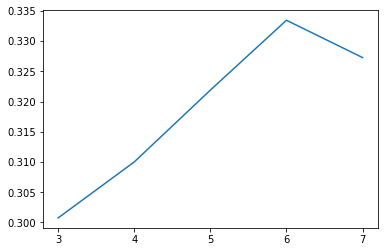

In [37]:
plt.plot(scores)
plt.xticks(range(0,5),range(3,18))
plt.show()

### KMeans Clustering

In [38]:
km = KMeans(n_clusters=5, random_state=123)
km.fit(dimensions)
km.labels_

KMeans(n_clusters=5, random_state=123)

array([1, 2, 0, ..., 1, 2, 0])

In [39]:
df['ClusterID'] = km.labels_

df[df.ClusterID == 0].shape
df[df.ClusterID == 1].shape
df[df.ClusterID == 2].shape
df[df.ClusterID == 3].shape
df[df.ClusterID == 4].shape

(1794, 14)

(1678, 14)

(2158, 14)

(2191, 14)

(1129, 14)

<Figure size 504x504 with 0 Axes>

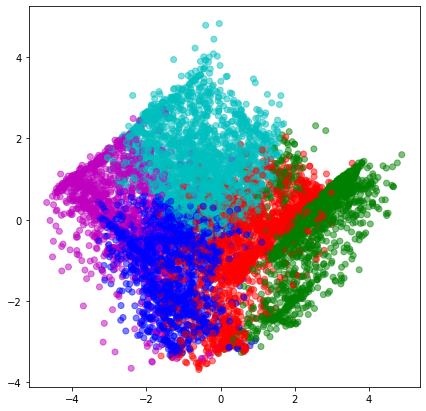

In [40]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

### Hierarchial Clustering - Agglomerative Hierarchical Clustering

Determining the number of clusters with dendogram for hierarchial clustering

Text(0.5, 1.0, 'Dendrogram')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Euclidean distances')

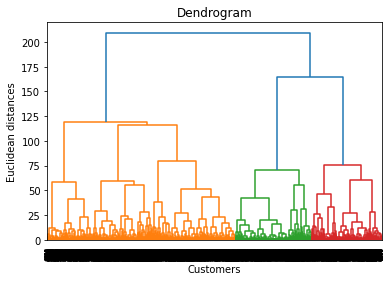

In [41]:
dendrogram = sch.dendrogram(sch.linkage(dimensions, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [41]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [42]:
y_hc=hc.fit_predict(dimensions)

In [43]:
df['ClusterIDAgg'] = y_hc

<Figure size 504x504 with 0 Axes>

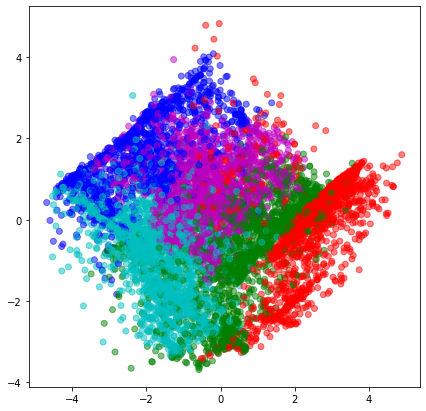

In [44]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in y_hc]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

## Cluster Analysis

Creating a copy dataframe original to retain original values

In [46]:
df1 = pd.read_csv('../../Datasets/credit-card-data.csv')
df1.drop('CUST_ID', axis=1, inplace=True)
# 1. Monthly Average Purchases
df1['MONTHLY_AVERAGE_PURCHASES'] = df1['PURCHASES'] / df['TENURE']

# 2. Monthly Cash Advance Amount
df1['MONTHLY_CASH_ADVANCE'] = df1['CASH_ADVANCE'] / df['TENURE']

def type_of_purchase(df):
    if (df['ONEOFF_PURCHASES'] == 0) and (df['INSTALLMENTS_PURCHASES'] == 0) :
        return 'NONE'
    elif (df['ONEOFF_PURCHASES'] > 0) and (df['INSTALLMENTS_PURCHASES']) > 0 :
        return 'BOTH'
    elif (df['ONEOFF_PURCHASES'] > 0) and (df['INSTALLMENTS_PURCHASES'] == 0) :
        return 'ONE_OFF'
    elif (df['ONEOFF_PURCHASES'] == 0) and (df['INSTALLMENTS_PURCHASES'] > 0) :
        return 'INSTALLMENTS'

df1['TYPE_OF_PURCHASE'] = df1.apply(type_of_purchase, axis=1)

# 4. Limit Usage
df1['LIMIT_USAGE'] = df1.apply(lambda x: round(x['BALANCE']/x['CREDIT_LIMIT'], 2), axis=1)

df1['PAYTOMINPAY'] = df1.apply(lambda x: round(x['PAYMENTS'] / x['MINIMUM_PAYMENTS'],2), axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['TYPE_OF_PURCHASE'], drop_first=True)], axis=1)

### Cluster Analysis for KMeans

<Figure size 1440x1080 with 0 Axes>

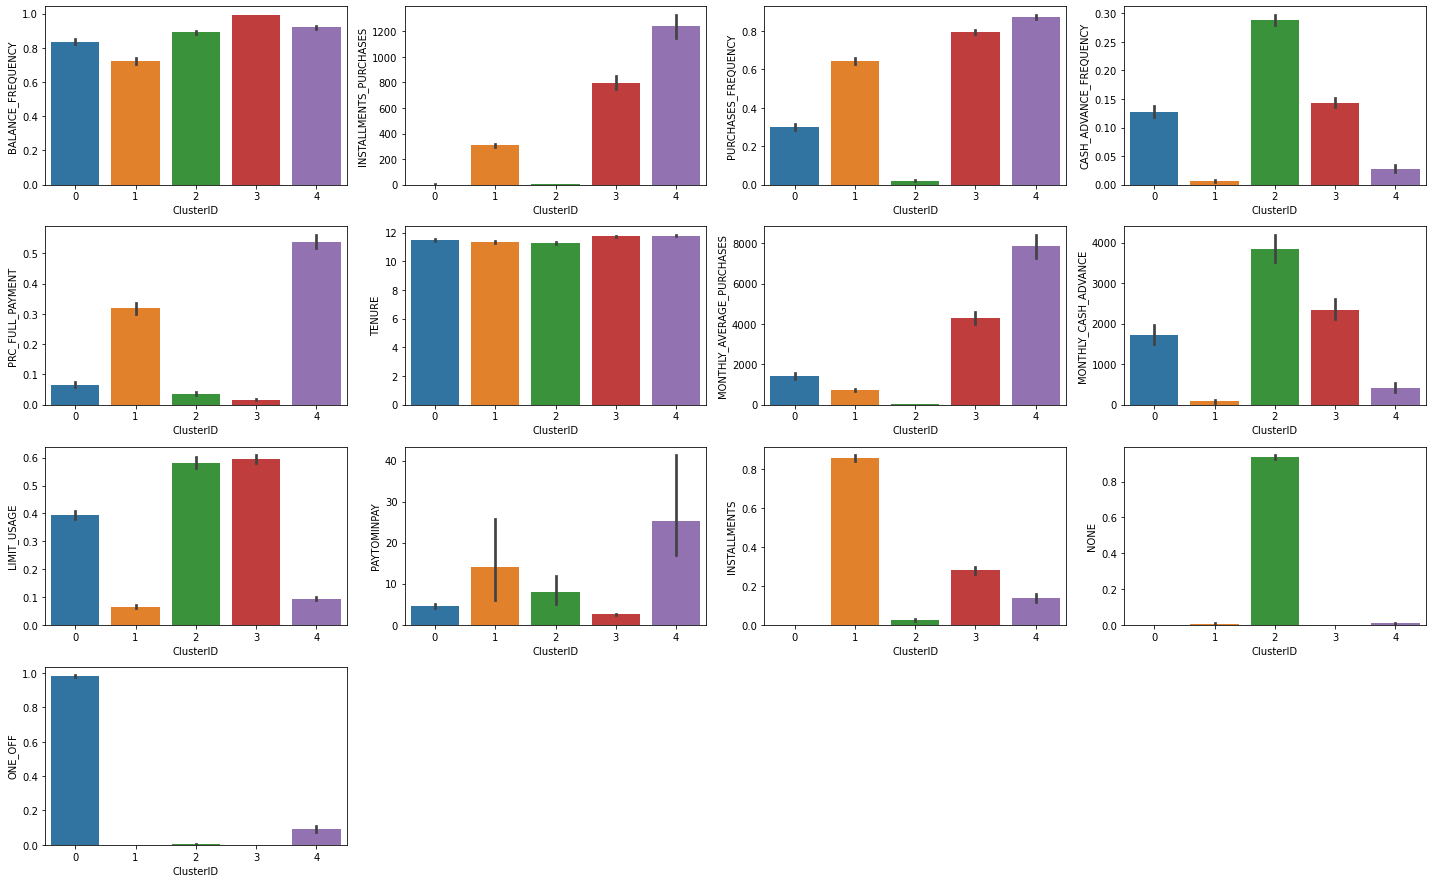

In [47]:
a, b, c = 5, 4, 1
plt.figure(figsize=(20, 15))
for i in df.drop(['ClusterID', 'ClusterIDAgg'], axis=1).columns:
    plt.tight_layout()
    plt.subplot(a, b, c)
    c+=1
    sns.barplot(df['ClusterID'], df1[i])
    

### Cluster Analysis for Agglomerative Hierarchial Clustering

<Figure size 1440x1080 with 0 Axes>

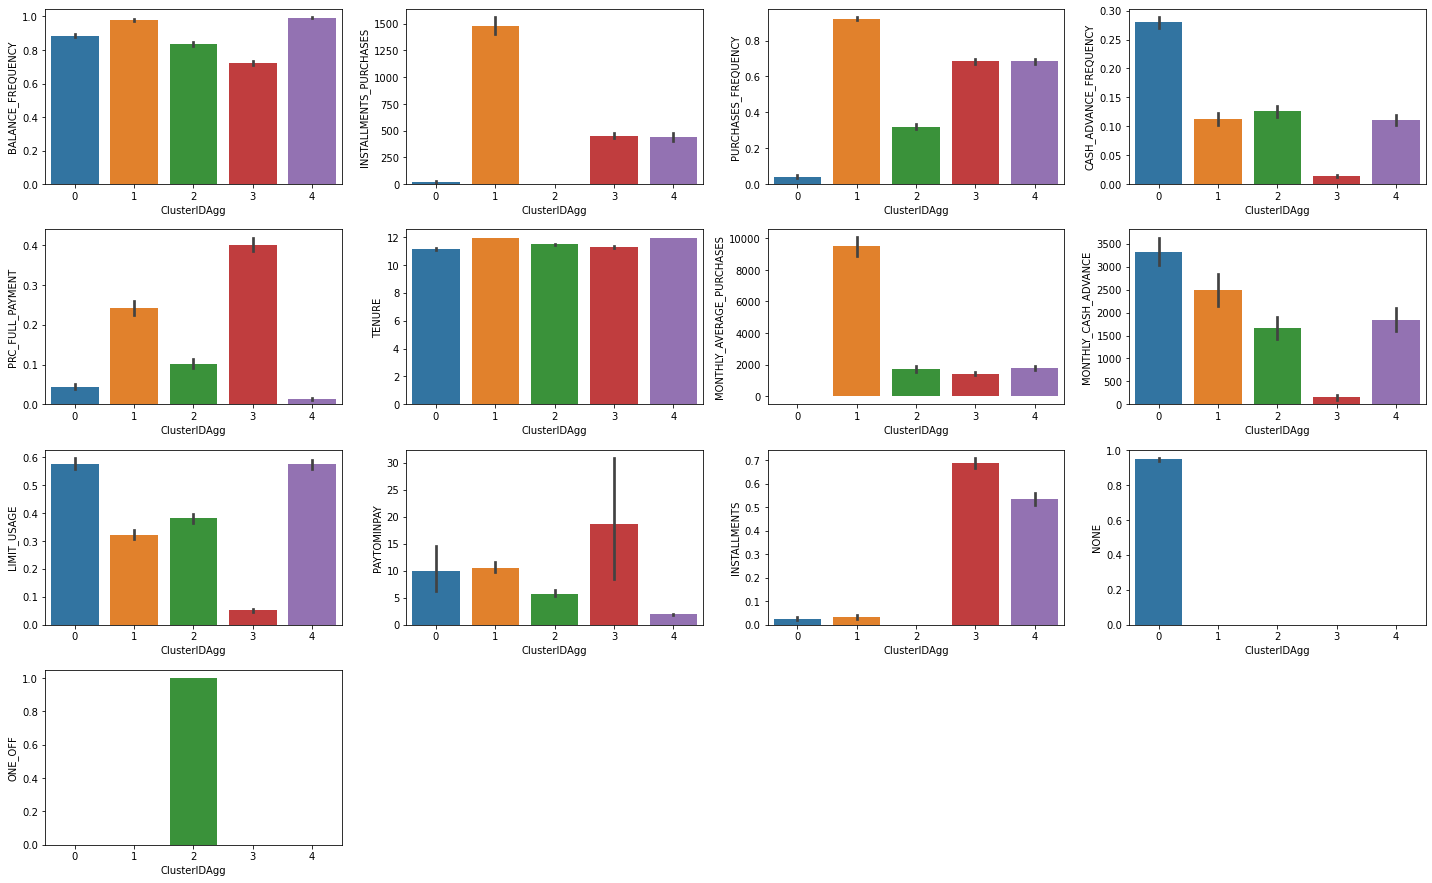

In [48]:
a, b, c = 5, 4, 1
plt.figure(figsize=(20, 15))
for i in df.drop(['ClusterID', 'ClusterIDAgg'], axis=1).columns:
    plt.tight_layout()
    plt.subplot(a, b, c)
    c+=1
    sns.barplot(df['ClusterIDAgg'], df1[i])
    

## Writing Predictions to a file

In [49]:
df.head()

,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVERAGE_PURCHASES,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PAYTOMINPAY,INSTALLMENTS,NONE,ONE_OFF,ClusterID,ClusterIDAgg
0,-0.418299,-0.506084,-0.806490,-0.773925,-0.565256,0.36068,-0.746478,-0.638722,-1.010074,-0.512871,1.720516,-0.543690,-0.514625,1,4
1,0.070718,-0.751122,-1.221758,0.899287,0.410741,0.36068,-0.855531,1.915262,0.300806,-0.092978,-0.581221,1.839282,-0.514625,2,0
2,0.559735,-0.751122,1.269843,-0.773925,-0.565256,0.36068,0.028289,-0.638722,-0.095507,-0.600270,-0.581221,-0.543690,1.943162,0,2
3,-1.396334,-0.751122,-1.014125,-0.216190,-0.565256,0.36068,0.857995,-0.467274,-0.430848,-0.748467,-0.581221,-0.543690,1.943162,0,2
4,0.559735,-0.751122,-1.014125,-0.773925,-0.565256,0.36068,-0.837241,-0.638722,0.971489,-0.262075,-0.581221,-0.543690,1.943162,0,2


In [50]:
a = df.drop('ClusterID', axis=1)
b = df.drop('ClusterIDAgg', axis=1)

In [51]:
a.to_csv('agglomerative.csv')


In [52]:
b.to_csv('kmeans.csv')